# Wczytywanie danych

In [2]:
import pandas as pd
from janitor import clean_names

credit = pd.read_csv("data/german_credit_final.csv")
credit = credit.clean_names()


# Podział danych na zbiór treningowy i testowy



In [4]:
from sklearn.model_selection import train_test_split

X = credit.drop("risk", axis=1)
y = credit["risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drzewo decyzyjne

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

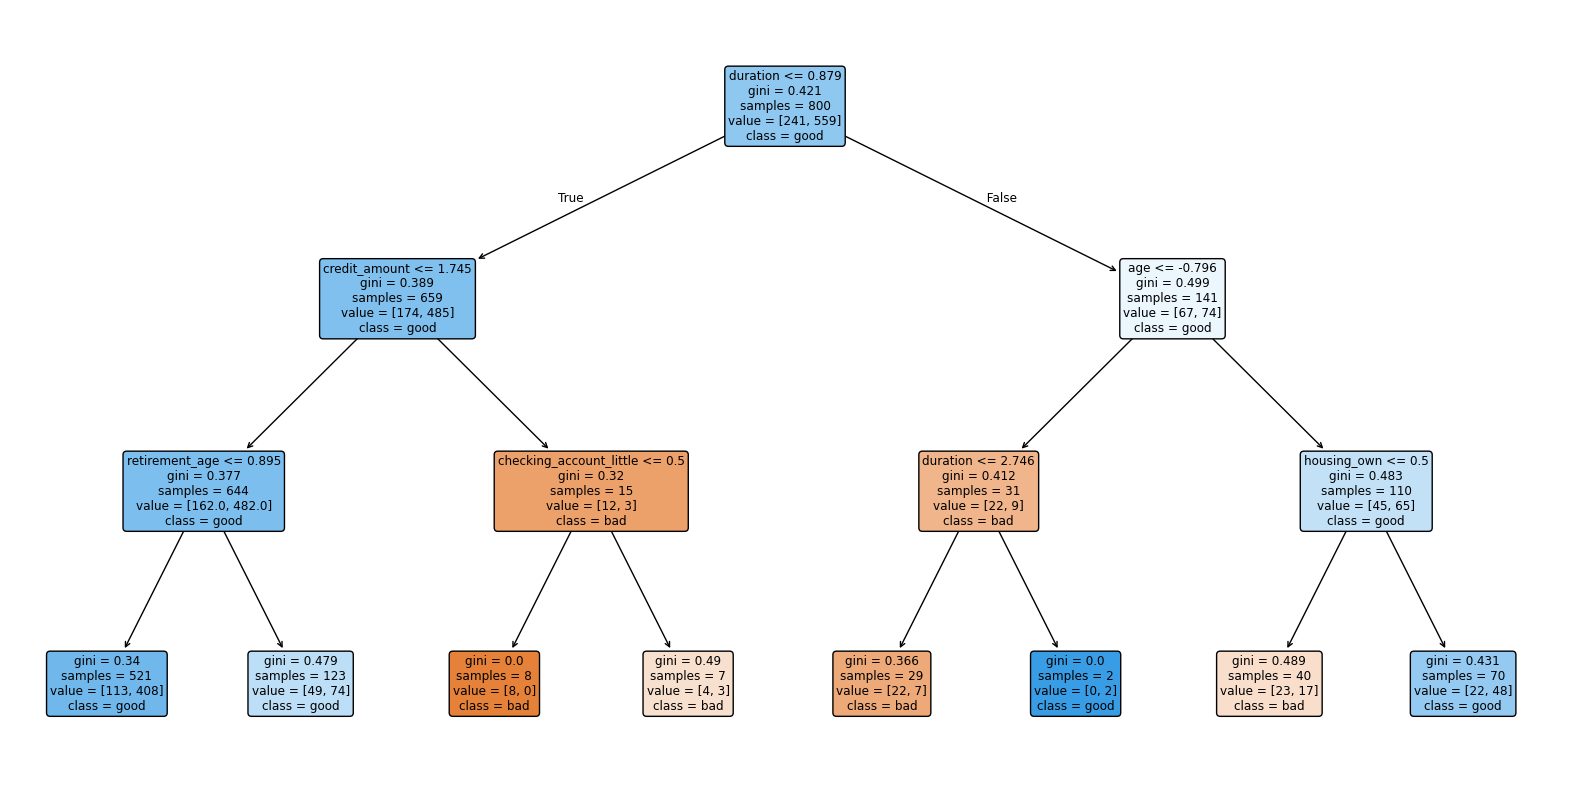

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf_tree, filled=True, feature_names=X.columns, class_names=['bad', 'good'], rounded=True)
plt.show()

# Ocena jakości modelu

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score

y_pred_train_tree = clf_tree.predict(X_train)
confusion_matrix(y_train, y_pred_train_tree)

array([[ 57, 184],
       [ 27, 532]])

In [16]:
print(classification_report(y_train, y_pred_train_tree))

              precision    recall  f1-score   support

           0       0.68      0.24      0.35       241
           1       0.74      0.95      0.83       559

    accuracy                           0.74       800
   macro avg       0.71      0.59      0.59       800
weighted avg       0.72      0.74      0.69       800



In [21]:
def evaluate_model(y_true, y_pred):

    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = tn / (tn + fp)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")     



In [30]:
evaluate_model(y_train, y_pred_train_tree)

Confusion Matrix:
[[ 57 184]
 [ 27 532]]
Accuracy: 0.7362
Balanced Accuracy: 0.5941
Recall: 0.9517
Precision: 0.7430
F1 Score: 0.8345
Specificity: 0.2365


In [31]:
y_pred_test_tree = clf_tree.predict(X_test)
evaluate_model(y_test, y_pred_test_tree)

Confusion Matrix:
[[ 11  48]
 [  8 133]]
Accuracy: 0.7200
Balanced Accuracy: 0.5649
Recall: 0.9433
Precision: 0.7348
F1 Score: 0.8261
Specificity: 0.1864


Accuracy = 0,72 = 72% trafności modelu

Balanced accuracy = 0,56 = 56% trafności modelu z uwzględnieniem nierównowagi klas, trochę powyżej niż losowe zgadywanie

Recall (czułość) = 0,94 = 94% udaje się wykryć 94% dobrych klientów, tylko 6% klasyfikuje jako złych klientów

Precision (precyzja) = 0,73 = 73% klientów zaklasyfikowanych jako dobrzy klienci, to rzeczywiście dobrzy klienci - tacy co spłacają kredyty

F1 score = 0,82 = 82% dobra skuteczność modelu dla klasy dobrych klientów, czyli tych co spłacają kredyty

Specificity (swoistość) = 0,1864 = 18,64% tylko 18% złych klientów zostało poprawnie rozpoznanych, a 82% złych klientów jest klasyfikowanych jako dobrzy klienci

# Krzywa ROC

0.5439355691789879


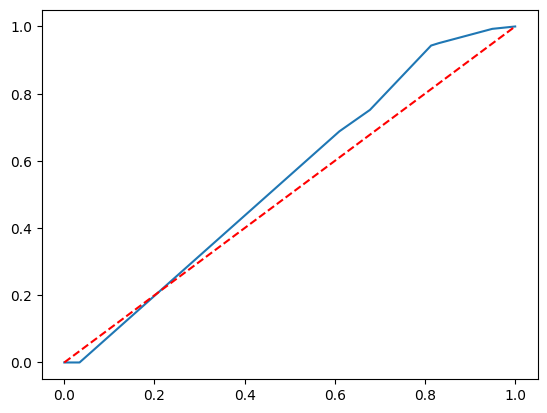

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_test_tree = clf_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test_tree)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
print(roc_auc_score(y_test, y_pred_proba_test_tree))

# Maszyna wektorów nośnych (SVM)

In [53]:
from sklearn.svm import SVC

# clf_svm = SVC(random_state=42, probability=True, kernel='linear')
clf_svm = SVC(random_state=42, probability=True, kernel='poly')
# clf_svm = SVC(random_state=42, probability=True, kernel='rbf')
clf_svm.fit(X_train, y_train)

y_pred_train_svm = clf_svm.predict(X_train)
y_pred_test_svm = clf_svm.predict(X_test)

In [54]:
evaluate_model(y_train, y_pred_train_svm)

Confusion Matrix:
[[ 78 163]
 [ 10 549]]
Accuracy: 0.7837
Balanced Accuracy: 0.6529
Recall: 0.9821
Precision: 0.7711
F1 Score: 0.8639
Specificity: 0.3237


In [55]:
evaluate_model(y_test, y_pred_test_svm)

Confusion Matrix:
[[ 10  49]
 [ 10 131]]
Accuracy: 0.7050
Balanced Accuracy: 0.5493
Recall: 0.9291
Precision: 0.7278
F1 Score: 0.8162
Specificity: 0.1695


0.607524942901791


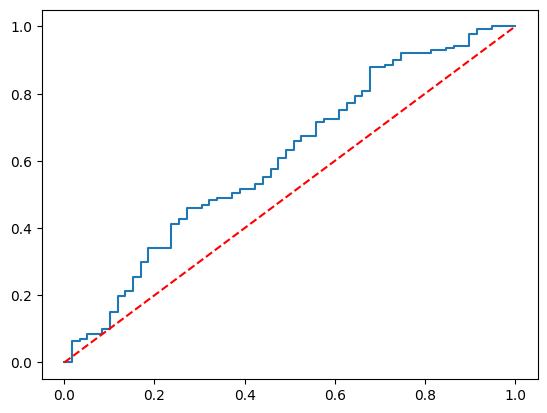

In [57]:
def roc_plot(y_true, X, clf):
    y_pred_proba = clf.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    print(roc_auc_score(y_true, y_pred_proba))

roc_plot(y_test, X_test, clf_svm)

# Las losowy

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
clf_rf.fit(X_train, y_train)
y_pred_train_rf = clf_rf.predict(X_train)
y_pred_test_rf = clf_rf.predict(X_test)

In [64]:
evaluate_model(y_train, y_pred_train_rf)

Confusion Matrix:
[[ 53 188]
 [  1 558]]
Accuracy: 0.7638
Balanced Accuracy: 0.6091
Recall: 0.9982
Precision: 0.7480
F1 Score: 0.8552
Specificity: 0.2199


In [65]:
evaluate_model(y_test, y_pred_test_rf)

Confusion Matrix:
[[  5  54]
 [  3 138]]
Accuracy: 0.7150
Balanced Accuracy: 0.5317
Recall: 0.9787
Precision: 0.7188
F1 Score: 0.8288
Specificity: 0.0847


0.6480346195456185


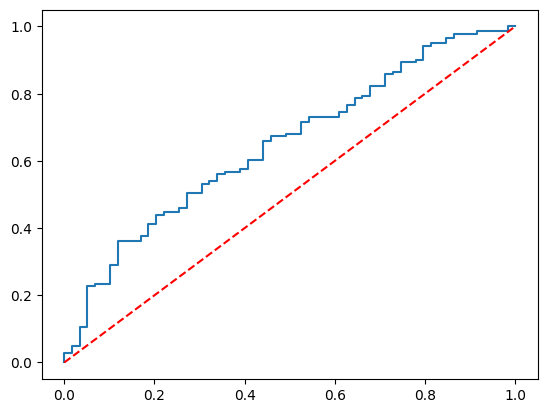

In [66]:
roc_plot(y_test, X_test, clf_rf)

# Boosting gradientowy

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(random_state=42, n_estimators=100)
clf_gb.fit(X_train, y_train)
y_pred_train_gb = clf_gb.predict(X_train)
y_pred_test_gb = clf_gb.predict(X_test)   

In [68]:
evaluate_model(y_train, y_pred_train_gb)

Confusion Matrix:
[[144  97]
 [ 10 549]]
Accuracy: 0.8662
Balanced Accuracy: 0.7898
Recall: 0.9821
Precision: 0.8498
F1 Score: 0.9112
Specificity: 0.5975


In [69]:
evaluate_model(y_test, y_pred_test_gb)

Confusion Matrix:
[[ 11  48]
 [ 14 127]]
Accuracy: 0.6900
Balanced Accuracy: 0.5436
Recall: 0.9007
Precision: 0.7257
F1 Score: 0.8038
Specificity: 0.1864


0.666185839644188


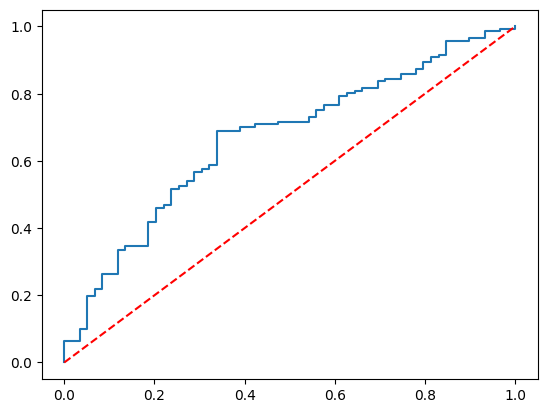

In [70]:
roc_plot(y_test, X_test, clf_gb)

# XGBoost

In [71]:
! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 2.4/150.0 MB 15.2 MB/s eta 0:00:10
   - -------------------------------------- 6.3/150.0 MB 16.9 MB/s eta 0:00:09
   -- ------------------------------------- 9.2/150.0 MB 15.7 MB/s eta 0:00:09
   --- ------------------------------------ 11.8/150.0 MB 15.1 MB/s eta 0:00:10
   --- ------------------------------------ 14.7/150.0 MB 14.7 MB/s eta 0:00:10
   ---- ----------------------------------- 17.0/150.0 MB 14.1 MB/s eta 0:00:10
   ----- ---------------------------------- 19.1/150.0 MB 13.5 MB/s eta 0:00:10
   ----- ---------------------------------- 21.5/150.0 MB 13.0 MB/s eta 0:00:10
   ------ --------------------------------- 23.9/150.0 MB 12.8 MB/s eta 0:00:10
   ------ --------------------------------- 26.0/150.0 MB 12.6 MB/s eta 0:00:10
   ------- -------------------------------- 28.6/150.0 MB 12.5 MB/s eta 0:00:10
   -------- ------------------------------- 30.9/150


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=4)
clf_xgb.fit(X_train, y_train)
y_pred_train_xgb = clf_xgb.predict(X_train)
y_pred_test_xgb = clf_xgb.predict(X_test)

In [81]:
evaluate_model(y_train, y_pred_train_xgb)

Confusion Matrix:
[[216  25]
 [  0 559]]
Accuracy: 0.9688
Balanced Accuracy: 0.9481
Recall: 1.0000
Precision: 0.9572
F1 Score: 0.9781
Specificity: 0.8963


In [82]:
evaluate_model(y_test, y_pred_test_xgb)

Confusion Matrix:
[[ 14  45]
 [ 21 120]]
Accuracy: 0.6700
Balanced Accuracy: 0.5442
Recall: 0.8511
Precision: 0.7273
F1 Score: 0.7843
Specificity: 0.2373


0.6725567976920303


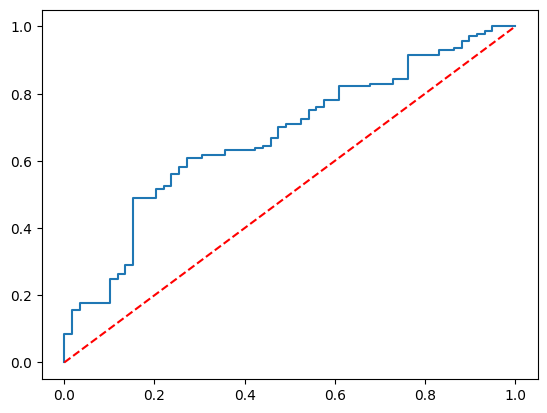

In [83]:
roc_plot(y_test, X_test, clf_xgb)

# Walidacja krzyżowa

In [86]:
from sklearn.model_selection import cross_val_score

scores_cv = cross_val_score(clf_xgb, X, y, cv=5, scoring='roc_auc')
scores_cv

array([0.64488095, 0.6375    , 0.64571429, 0.69166667, 0.57904762])

In [88]:
print(scores_cv.mean())

0.6397619047619048


# Tuning hiperparametrów

## Pełne przeszukiwanie siatki

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [94]:
grid_search.best_score_

np.float64(0.6710839107602502)

In [96]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100}

In [97]:
clf_xgb_best = grid_search.best_estimator_
y_pred_test_xgb_best = clf_xgb_best.predict(X_test)
evaluate_model(y_test, y_pred_test_xgb_best)

Confusion Matrix:
[[ 12  47]
 [ 10 131]]
Accuracy: 0.7150
Balanced Accuracy: 0.5662
Recall: 0.9291
Precision: 0.7360
F1 Score: 0.8213
Specificity: 0.2034


0.6515807188363987


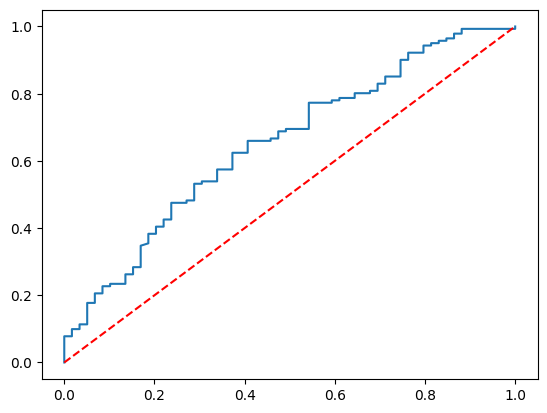

In [98]:
roc_plot(y_test, X_test, clf_xgb_best)

## Użycie parametrów ze słownika

In [101]:
clf_xgb_new = XGBClassifier(random_state=42)
best_params = {'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100}

clf_xgb_new.set_params(**best_params)
clf_xgb_new.fit(X_train, y_train)
y_pred_test_xgb_new = clf_xgb_new.predict(X_test)
evaluate_model(y_test, y_pred_test_xgb_new)

Confusion Matrix:
[[ 12  47]
 [ 10 131]]
Accuracy: 0.7150
Balanced Accuracy: 0.5662
Recall: 0.9291
Precision: 0.7360
F1 Score: 0.8213
Specificity: 0.2034


## Losowe przeszukiwanie siatki

In [104]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.001, 0.01],
    'reg_lambda': [1, 5]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.001, 0.01],
                                        'reg_lambda': [1, 5],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='roc_auc', verbose=1)

In [105]:
random_search.best_score_

np.float64(0.6903730580069866)

In [106]:
random_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0.01,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.7}

In [107]:
clf_xgb_best_random = random_search.best_estimator_
y_pred_test_xgb_best_random = clf_xgb_best_random.predict(X_test)
evaluate_model(y_test, y_pred_test_xgb_best_random)

Confusion Matrix:
[[ 11  48]
 [  6 135]]
Accuracy: 0.7300
Balanced Accuracy: 0.5719
Recall: 0.9574
Precision: 0.7377
F1 Score: 0.8333
Specificity: 0.1864


0.6831349921865608


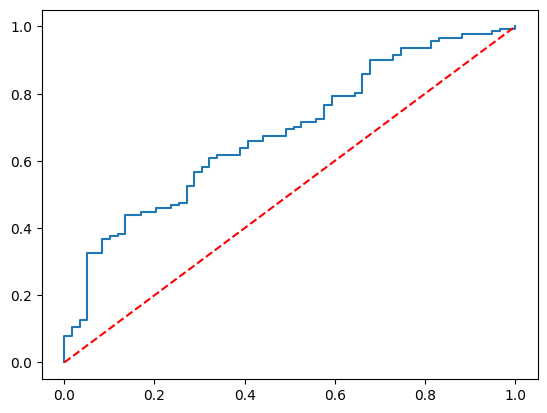

In [108]:
roc_plot(y_test, X_test, clf_xgb_best_random)

## Tuning lasu losowego

In [112]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8, 0.6], # 'sqrt' jest często równe 0.5 (liczba cech) dla klasyfikacji
    'bootstrap': [True, False], # True jest często domyślne i optymalne, ale można przetestować False
    'criterion': ['gini', 'entropy']
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=150,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
random_search_rf.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


np.float64(0.6922479718238647)

In [113]:
random_search_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

# Ważność cech

In [115]:
clf_xgb_best_random.feature_importances_

array([0.0405526 , 0.04275053, 0.0475702 , 0.04192719, 0.04039898,
       0.02924551, 0.03336646, 0.02207582, 0.02700807, 0.02530175,
       0.02756184, 0.04039979, 0.05617843, 0.0364487 , 0.03005581,
       0.02276504, 0.03960638, 0.03319194, 0.02223516, 0.03716649,
       0.02744914, 0.03177802, 0.03473914, 0.        , 0.03482241,
       0.01459027, 0.04557046, 0.        , 0.        , 0.05046548,
       0.03404392, 0.01425603, 0.01647845, 0.        ], dtype=float32)

In [116]:
fi_df = pd.DataFrame({
    'feature': X.columns,
    'importance': clf_xgb_best_random.feature_importances_
}).sort_values(by='importance', ascending=False)
fi_df

,feature,importance
12,housing_own,0.056178
29,age_group_30,0.050465
2,duration,0.047570
26,purpose_radio_tv,0.045570
1,credit_amount,0.042751
3,installment,0.041927
0,age,0.040553
11,housing_free,0.040400
4,retirement_age,0.040399
16,saving_accounts_quite_rich,0.039606


In [117]:
from sklearn.inspection import permutation_importance

fi_results = permutation_importance(
    clf_xgb_best_random, X_test, y_test, n_repeats=30, random_state=42
)

In [119]:
fi_results_df = pd.DataFrame({
    'feature': X.columns,
    'importance': fi_results.importances_mean
}).sort_values(by='importance', ascending=False)
fi_results_df

,feature,importance
1,credit_amount,0.031000
3,installment,0.022333
30,age_group_30_40,0.015000
2,duration,0.013833
19,checking_account_moderate,0.012333
4,retirement_age,0.012167
0,age,0.010667
26,purpose_radio_tv,0.005167
12,housing_own,0.004000
13,housing_rent,0.003833


In [120]:
! pip install shap

  Using cached shap-0.47.2-cp313-cp313-win_amd64.whl
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
import shap
explainer = shap.Explainer(clf_xgb_best_random, X_train)
shap_values = explainer(X_test)

d:\CDV\mad_gr1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [124]:
instance_idx = 2

shap_results = pd.DataFrame({
    'feature': X.columns,
    'shap_value': shap_values[instance_idx].values
}).sort_values(by='shap_value', ascending=False, key=abs)
shap_results

,feature,shap_value
1,credit_amount,0.134110
12,housing_own,0.115859
26,purpose_radio_tv,-0.063805
14,saving_accounts_little,0.053668
0,age,-0.048188
2,duration,-0.042770
19,checking_account_moderate,0.040378
5,sex_female,0.033637
3,installment,-0.032713
30,age_group_30_40,0.024055
